In [1]:
# just to practice

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [23]:
# LOADING DATA FROM CVS FILE

dataset = pd.read_csv("trainingSet_LgRg.csv") # read the dataset from csv file

x_train = np.array(dataset.iloc[:, :2])
y_train = np.array(dataset.iloc[:, 2:])

print(f'Range input 1: {min(x_train[:, 0]):.02f} to {max(x_train[:, 0]):.02f}')
print(f'Range input 2: {min(x_train[:, 1]):.02f} to {max(x_train[:, 1]):.02f}')

Range input 1: 1.20 to 5.10
Range input 2: 2.50 to 6.20


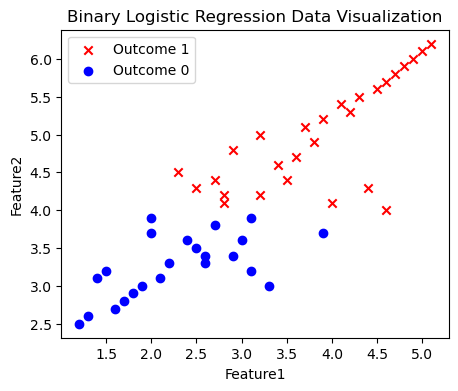

In [24]:
# SOME VISUALIZATIONS

plt.figure(figsize=(5, 4))

# Plot the points where Outcome is 1 (Positive)
plt.scatter(dataset[dataset['Outcome'] == 1]['Feature1'], dataset[dataset['Outcome'] == 1]['Feature2'], 
            color='red', label='Outcome 1', marker='x')

# Plot the points where Outcome is 0 (Negative)
plt.scatter(dataset[dataset['Outcome'] == 0]['Feature1'], dataset[dataset['Outcome'] == 0]['Feature2'], 
            color='blue', label='Outcome 0', marker='o')

# Add labels and title
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Binary Logistic Regression Data Visualization')

# Add a legend
plt.legend()

# Show the plot
plt.show()

Sigmoid function:  

$g(z) = \frac{1}{1+e^{-z}}\tag{1}$

In [25]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Logistic regression cost function: 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}} 
\end{align}
$$

In [26]:
def logistic_cost(X, Y, w, b):

    m = X.shape[0]

    total_cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i,:], w) + b 
        f_xi = sigmoid(z_i)
        
        # loss:
        loss = (-1) * (Y[i,0] * np.log(f_xi) + (1-Y[i,0]) * np.log(1 - f_xi))

        total_cost += loss

    total_cost = total_cost/m
    return total_cost    

Gradient descent algorithm:
$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; & \text{for j := 0..n-1} \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

Where:
$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}\\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$

In [27]:
def compute_gradient(X, Y, w, b):

    m, n = X.shape

    dj_dw = np.zeros(n)
    dj_db = 0

    for i in range(m):
        z_i = np.dot(X[i, :], w) + b
        f_xi = sigmoid(z_i)

        err = f_xi - Y[i,0]
        
        dj_db += err

        for j in range(n):
            dj_dw[j] += err*X[i,j]

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return dj_dw, dj_db

In [28]:
def gradient_descent(X, Y, w, b, num_iter, alpha):

    m = X.shape[0]

    w_out = copy.deepcopy(w)
    b_out = b

    j_hist = []
    for i in range(num_iter):
        dj_dw, dj_db = compute_gradient(X, Y, w_out, b_out)
        
        b_out -= alpha*dj_db
        w_out -= alpha*dj_dw

        j_hist.append(logistic_cost(X, Y, w_out, b_out))

    return w_out, b_out, j_hist

In [29]:
# random initialization
w = np.zeros(x_train.shape[1]) 
b = 0

num_iters = 100000
learning_rate = 0.1

w, b, j_hist = gradient_descent(x_train, y_train, w, b, num_iters, learning_rate)

print(f'Initial cost: {j_hist[0]:0.4f}, final cost: {j_hist[-1]:0.4f}')
print(f'Decision boundary function: {w[0]:.02f}*x1 + {w[1]:.02f}*x2 = {b*-1:.02f}')

Initial cost: 0.6547, final cost: 0.0389
Decision boundary function: 1.10*x1 + 9.32*x2 = 40.29


(0.0, 100000.0)

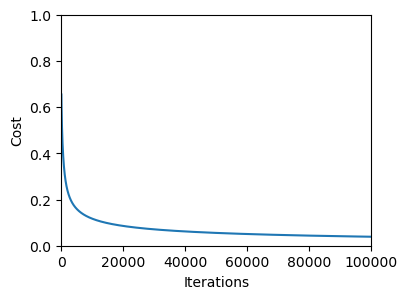

In [30]:
# COST VISUALIZATIONS
plt.figure(figsize=(4, 3))
plt.plot(j_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.ylim(0, 1)
plt.xlim(0, 100000)

In [31]:
def function(w, b, x):
    return (-w[0]*x - b)/w[1]

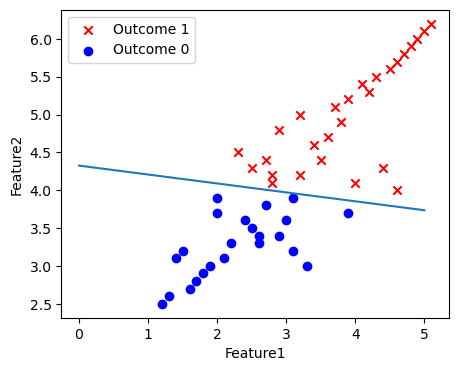

In [32]:
plt.figure(figsize=(5, 4))

aux = np.arange(0,6)

plt.plot(aux, function(w, b, aux))

# Plot the points where Outcome is 1 (Positive)
plt.scatter(dataset[dataset['Outcome'] == 1]['Feature1'], dataset[dataset['Outcome'] == 1]['Feature2'], 
            color='red', label='Outcome 1', marker='x')

# Plot the points where Outcome is 0 (Negative)
plt.scatter(dataset[dataset['Outcome'] == 0]['Feature1'], dataset[dataset['Outcome'] == 0]['Feature2'], 
            color='blue', label='Outcome 0', marker='o')

# Add labels and title
plt.xlabel('Feature1')
plt.ylabel('Feature2')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [13]:
# UNSING scikit-learn

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression()
model.fit(x_train, y_train[:,0])

LogisticRegression()